# Demos for Newton's method

In [1]:
import sys
import numpy as np
sys.path.append('../autodiff') 

from autodiff.rootfinding import newton_method
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

### One-variable case for Newton's method

In [2]:
def func_one_variable(x: list):
    # function with one variable
    f = (x[0]-2)**2
    return [f]

# Find root of function, print root and trace
root, trace = newton_method(func=func_one_variable, num_of_variables=1, initial_val=[0], max_iter=10000, tol=1e-3)
print(f'Root of function: {root}')
print(f'Trace of function: {trace}')

Root of function: [1.96875]
Trace of function: [array([0]), array([1.]), array([1.5]), array([1.75]), array([1.875]), array([1.9375]), array([1.96875])]


##### Visualize trace of root finding

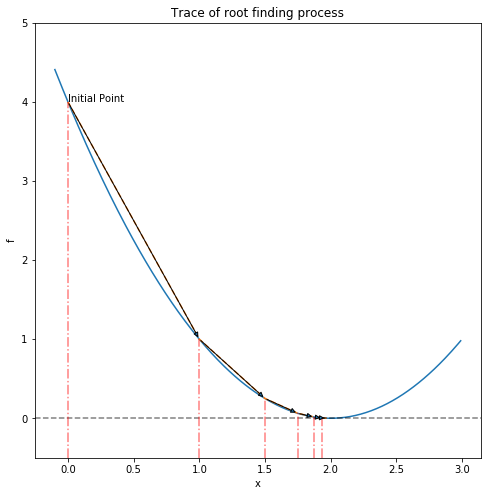

In [3]:
# Visualize trace of root finding

x = np.arange(-0.1, 3, 0.01)
f = [func_one_variable([x_])[0] for x_ in x]
trace_list = [x_[0] for x_ in trace]
trace_f = [func_one_variable([x_])[0] for x_ in trace_list]
trace_ymax = [(x_+0.5)/5.5 for x_ in trace_f]

plt.figure(figsize=(8, 8))
plt.ylim(-0.5, 5)
plt.plot(x, f)
plt.plot(trace_list, trace_f, '--')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.text(trace[0], trace_f[0], r'Initial Point')
for i in range(len(trace)-1):
    plt.axvline(x=trace[i], ymax=trace_ymax[i], color='red', linestyle='-.', alpha=0.5)
    plt.annotate("", xy=(trace[i+1], trace_f[i+1]), xytext=(trace[i], trace_f[i]), 
                 arrowprops=dict(arrowstyle="-|>"))
plt.xlabel('x')
plt.ylabel('f')
plt.title('Trace of root finding process')

plt.show()

### Vector case for Newton's method

In [4]:
def func_multi_variables(x: list):
    # function with multi variables
    f1 = x[0] + 2
    f2 = x[0] + x[1]**2 - 2
    return [f1, f2]

# Find root of function, print root and trace
root, trace = newton_method(func=func_multi_variables, num_of_variables=2, initial_val=[0, 1], max_iter=10000, tol=1e-3)
print(f'Root of function: {root}')
print(f'Trace of function: {trace}')

Root of function: [-2.          2.00000009]
Trace of function: [array([0, 1]), array([-2. ,  2.5]), array([-2.  ,  2.05]), array([-2.        ,  2.00060976]), array([-2.        ,  2.00000009])]


##### Visualize trace of root finding

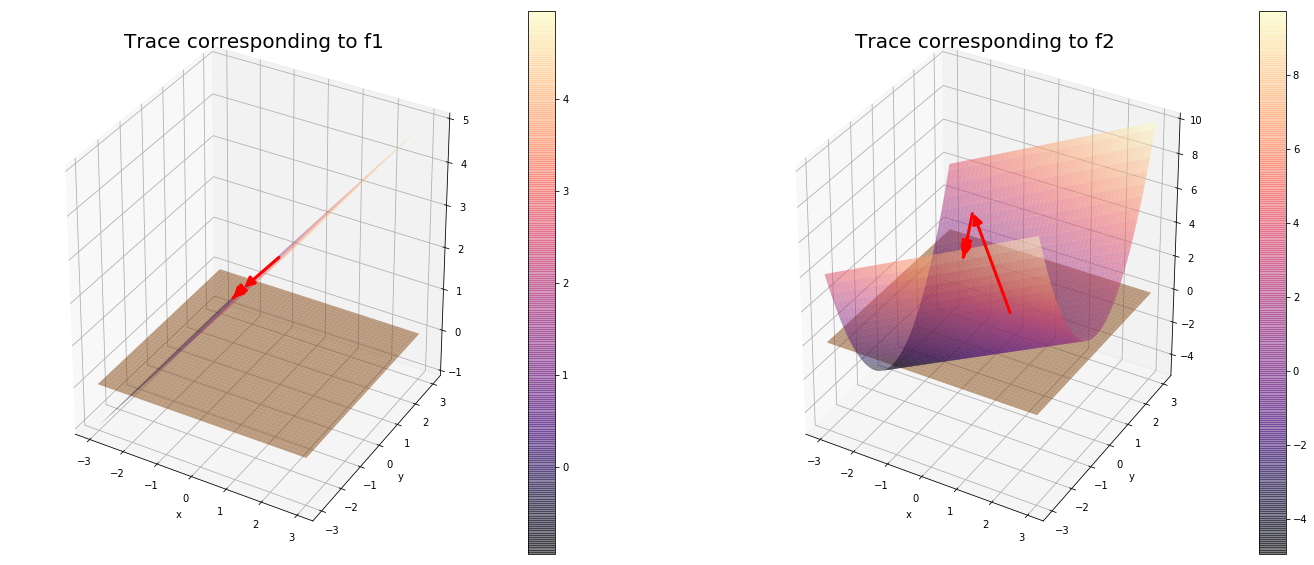

In [5]:
# Visualize trace of root finding

trace_f1 = [func_multi_variables(list(x_))[0] for x_ in trace]
trace_f2 = [func_multi_variables(list(x_))[1] for x_ in trace]

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)

Z1 = np.zeros(X.shape)
Z2 = np.zeros(X.shape)
Z_zero = np.zeros(X.shape)
for i in range(Z1.shape[0]):
    for j in range(Z1.shape[1]):
        Z1[i, j] = func_multi_variables([X[i, j], Y[i, j]])[0]
        Z2[i, j] = func_multi_variables([X[i, j], Y[i, j]])[1]

fig = plt.figure(figsize=(24, 10))

ax = fig.add_subplot(1, 2, 1, projection='3d')

surface = ax.plot_surface(X, Y, Z1, cmap='magma', alpha=0.5)
ax.plot_surface(X, Y, Z_zero, alpha=0.5)
fig.colorbar(surface)

for i in range(len(trace)-1):
    a = Arrow3D([trace[i][0], trace[i+1][0]], [trace[i][1], trace[i+1][1]], 
        [trace_f1[i], trace_f1[i+1]], mutation_scale=20, 
        lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_title('Trace corresponding to f1', fontsize=20)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(1, 2, 2, projection='3d')

surface = ax.plot_surface(X, Y, Z2, cmap='magma', alpha=0.5)
ax.plot_surface(X, Y, Z_zero, alpha=0.5)
fig.colorbar(surface)

for i in range(len(trace)-1):
    a = Arrow3D([trace[i][0], trace[i+1][0]], [trace[i][1], trace[i+1][1]], 
        [trace_f2[i], trace_f2[i+1]], mutation_scale=20, 
        lw=3, arrowstyle="-|>", color="red")
    ax.add_artist(a)

ax.set_title('Trace corresponding to f2', fontsize=20)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.draw()
plt.show()